# A Python Regression Analysis

First, we need to perform all necessary Python imports

In [143]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

## Regression with one variable

First, we need to read and store data.

In [144]:
data = np.genfromtxt('data/ex1data1', delimiter=',')
x = data[:,[0]]
y = data[:,[1]]

### Data Visualization

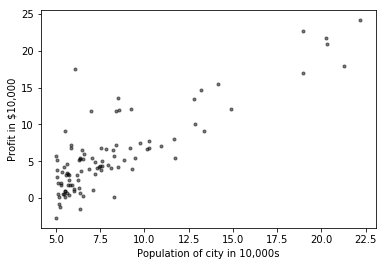

In [145]:
area   = np.pi*3
colors = (0,0,0)

plt.close('all')

plt.scatter(x,y,s=area,c=colors,alpha=0.5)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000')

plt.show()

### The Cost Function

The Cost Function is used to represent a linear expression that best represents a hypothesis for the data under study. The parameter θ takes values so that the function J (θ) is minimized by approaching the values ​​obtained with the reference values in y.

In [146]:
def cost_function(x, y, theta):
    m = y.size
    regression = x.dot(theta)
    regressionError = np.sum((regression - y)**2)
    return ((1./(2*m))*regressionError)

For the data under study, the cost function should return an approximate value of 32,072 for the initial values of θ. Let's test the function return to θ at zero

In [147]:
' Update y in order to perform good matrices operations '
y = data[:,1]
' Insert ones in order to perform good matrices operations '
x = np.insert(x, 0, np.ones(x.size), axis=1)
theta = np.array([0., 0.])
cost_function(x,y,theta)

32.072733877455676

### Gradient Descent

In order to find the better fit for our prediction model, lets implement the Gradient Descent algorithm and minimize our J(θ). We will perform little steps across theta values and control the convergence, in order to ensure  that the final θ are what we are looking for.

In [148]:
def gradient_descent(x, y, theta, alpha, tolerance, log = False):
    m = y.size
    episilon  = 0.000001
    residual  = np.ones(tolerance)
    interact = 0
    converge = False
    while not converge:
        ' step 1 : Start adjusting theta values '
        hypothesis   = x.dot(theta)
        error        = (hypothesis - y)
        gradient     = (1./m) * (alpha) * (x.T.dot(error))
        
        tmpTheta = theta
        theta = theta - gradient
        
        ' step 2 : Run the cost function over the data with new theta '
        residual[interact] = cost_function(x, y, theta)
        
        if interact % 100 == 0 and log:
            print('Interaction ' + str(interact) + ' - Residual cost '+ str(residual[interact]))
        
        ' step 3 : Verify convergence over the given episilon and residual given step, also verify tolerance tries '
        
        step = abs(np.linalg.norm(theta) - np.linalg.norm(tmpTheta))        
        converge = (step <= episilon)
        
        if (interact + 1) == tolerance:
            print('Caution! GD has reached the tolerance. Results may not converge.')
            converge = True
            
        interact = interact + 1
        
    return theta, residual, interact

In [149]:
(t,r,i) = gradient_descent(x, y, theta, 0.01, 4000)

print('Last interaction was '+ str(i) + ' and the output for θ is: ')
print(t)

Caution! GD has reached the tolerance. Results may not converge.
Last interaction was 4000 and the output for θ is: 
[-3.89286253  1.19274046]


The α component of the Gradient Descent is a scalar used to regulate the learning rate. It can be interpreted as the "step size" that will be given by the gradient vector. The higher the α, the more aggressive the learning rate.

Our test has reached the maximum number of attempts. We can conclude that the definition of the value for parameter α plays an important role in the convergence of our algorithm.

We still need to make sure that our task is performing as expected. So, we can plot the error rate behavior and ensure that it decreases when reaching the max interation. We can conlude that 0.01 lead us for the max execution and is not a good choice for α.

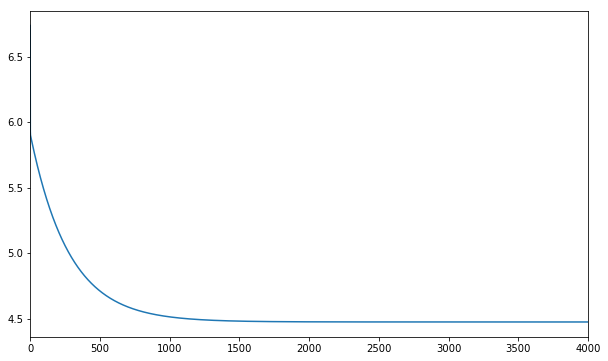

In [151]:
plt.close('all')

plt.figure(figsize=(10,6))

axes = plt.gca()
axes.set_xlim([0,i])

plt.plot(r)

plt.show()

### How to use the model and perform a prediction

Using the obtained model to perform a prediction is a very easy task when working with one variable linear regression. We will use matrice operations to obtain the prediction values for cities with 35.000 and 70.000 population

In [152]:
' Predicting values for 35.000 population '
p = np.array([1., 35.000]).dot(t)
print('Predicting values for 35.000 population : ' + str(p))

' Predicting values for 70.000 population '
p = np.array([1., 70.000]).dot(t)
print('Predicting values for 35.000 population : ' + str(p))

Predicting values for 35.000 population : 37.8530537174
Predicting values for 35.000 population : 79.5989699615


## Regression with multiple variables

In this stage of the work, we will perform Multivariate Linear Regression. For the data under study, it is necessary to perform a normalization task since the data are at different scales. Then, we will perform tasks similar to those performed in Simple Linear Regression, implementing a Gradient function capable of dealing with target data with various parameters.

Lets initialize the new sort of data.

In [153]:
data = np.genfromtxt('data/ex1data2', delimiter=',')
x = data[:,[0]]
y = data[:,1]

### Feature scaling or feature normalization

Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [154]:
def standardization(x):
    mean_residual = []
    std_residual  = []
    standardization = x
    
    dimension = x.shape[1]    
    for i in range(dimension):
        mean = np.mean(x[:, i])
        std  = np.std(x[:, i])
        
        mean_residual.append(mean)
        std_residual.append(std)
        
        standardization[:, i] = (1./std)*(standardization[:, i] - mean)
        
    return standardization

The above function runs over our target data and scale all features for the same interval. Lets run it and output the first target row.

In [155]:
print(standardization(data)[0])

[ 0.13141542 -0.22609337  0.48089023]


### Cost Function

In [156]:
def cost_function(x, y, theta):
    m = y.size
    regression = x.dot(theta)
    regressionError = np.sum((regression - y)**2)
    return ((1./(2*m))*regressionError)

### Gradient Descent

In [157]:
def gradient_descent(x, y, theta, alpha, tolerance, log=False):
    m = y.size
    episilon = 0.000001
    residual = np.ones(tolerance)
    interact = 0
    converge = False
    while not converge:
        ' step 1 : Start adjusting theta values '
        hypothesis   = x.dot(theta)
        error        = hypothesis - y
        gradient     = (1./m) * (alpha) * (x.T.dot(error))
        
        tmpTheta = theta
        theta = theta - gradient
        
        ' step 2: Run the cost function over the data with new theta '
        residual[interact] = cost_function(x, y, theta)
        
        if interact % 100 == 0 and log:
            ' The main idea here is to minimize the error value when evaluating the hypothesis '
            print('Error ' + str(residual[interact]))
        
        ' step 3 : Verify convergence over the given episilon and residual given step, also verify tolerance tries '
        step = abs(np.linalg.norm(theta) - np.linalg.norm(tmpTheta))        
        converge = (step <= episilon)
        
        if (interact + 1) == tolerance:
            print('Caution! GD has reached the tolerance. Results may not converge.')
            converge = True
            
        interact = interact + 1
        
    return theta, residual, interact

In [158]:
data = standardization(data)

x = data[:, :2]
y = data[:, [2]]
y = y[:,0]

x = np.insert(x, 0, np.ones(x.shape[0]), axis=1)

theta = np.array([0., 0., 0.])

(t,r,i) = gradient_descent(x, y, theta, 0.01, 4000)

print('Last interaction was ' + str(i)  + ' and the output for θ is: ')
print(t) 

Last interaction was 1745 and the output for θ is: 
[ -2.81630511e-17   8.84552670e-01  -5.29655019e-02]


This time, our Gradient Descent has converged and stoped before interaction counter reaches the tolerance limit. Lets visualize the error rate behavior while performing the task and make sure it deacrases until the max interaction.

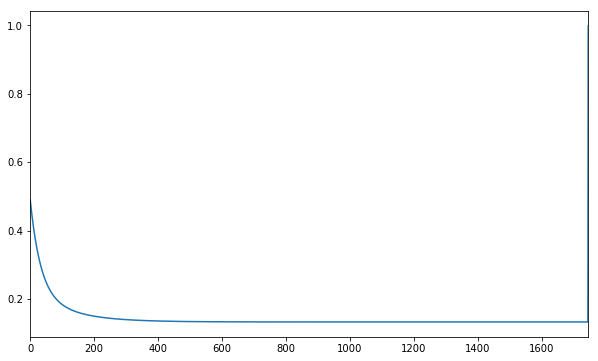

In [159]:
plt.close('all')

plt.figure(figsize=(10,6))

axes = plt.gca()
axes.set_xlim([0,i])

plt.plot(r)

plt.show()